In [1]:
# Imports 

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array

def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [43]:
# Splitting the data 

train_data, test_data = tf.keras.utils.image_dataset_from_directory(
    directory='data',
    labels='inferred',
    label_mode=None,
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.1,
    subset="both",
    seed=1)

Found 17534 files belonging to 1 classes.
Using 15781 files for training.
Using 1753 files for validation.


In [88]:
# Data Preprocessing

norm = layers.Rescaling(scale=1/10)
noise = layers.GaussianNoise(stddev=1000)

norm_train_data = train_data.map(lambda x: norm(x))
#noise_train_data = train_data.map(lambda x:)

norm_test_data = test_data.map(lambda x: norm(x))
noise_test_data = norm_test_data.map(lambda x: noise(x))

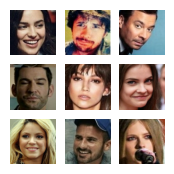

In [89]:
plt.figure(figsize=(2, 2))
for images in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

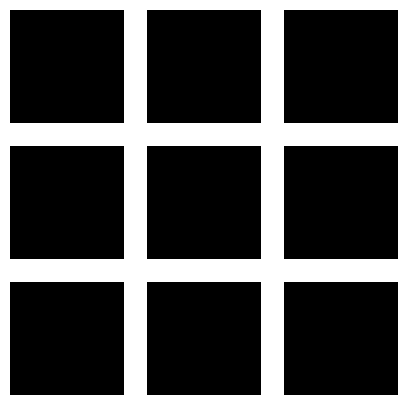

In [90]:
plt.figure(figsize=(5, 5))
for images in norm_train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")